## Assignment 18
Implement the following:
1. Use dlib Face Detector 
2. Align the face using 5-pt detector and align (take a 5 second video of your face with some translation and rotation (not extreme)
3. Calculate 68-pt landmark on the aligned faces
4. Calculate the optical flow for these 68-pts every frame
5. Stabilize the optical flow using LK method as we discussed. 
6. Create a 5 second video, with three windows:
  * First: Original frame
  * Aligned Frame with unstabilized points
  * Aligned Frame with stabilized points. 
  * If the original video was 400x400 resolution, final video is 1200x400. Final video is 5 seconds and we need to see all 3 videos side by side for comparison. 
7. Upload to youtube, and embed the video in your readme file. 
8. Share the link. 

Note: This is a group of 4 assignment. All 4 CAN share same code and same video or different too. 

### Facial Landmark Detection Code

In [0]:
!wget 'https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat'
!wget 'https://user-images.githubusercontent.com/15984084/69808826-76313580-120e-11ea-9266-a1da49d239f6.jpg' -O 'family.jpg'
!wget 'https://raw.githubusercontent.com/arjuntheprogrammer/TheSchoolOfAI/master/OtherExamples/OpticalFlow/renderFace.py' -O  'renderFace.py'

In [0]:
!mkdir /content/results

mkdir: cannot create directory ‘/content/results’: File exists


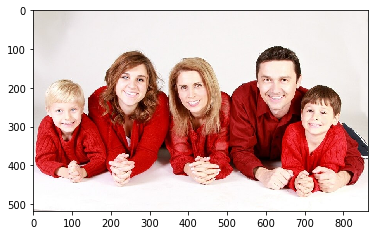

In [0]:
import dlib
import cv2
import numpy as np
from renderFace import renderFace

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x),int(p.y)))

  f.close()

# Landmark model location
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"

# Get the face detector instance
faceDetector = dlib.get_frontal_face_detector()

# Initialize the Landmark Predictor (a.k.a Shape predictor)
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# Read image
imageFilename = "/content/family.jpg"
im= cv2.imread(imageFilename)

# landmarks will be stored in results/family_i.txt
landmarksBasename = "/content/results/family"
plt.imshow(im[:,:,::-1])
plt.show()

### Detect Faces 

Number of faces detected:  5
Number of landmarks 68
Saving landmarks to /content/results/family_0.txt
Saving landmarks to /content/results/family_1.txt
Saving landmarks to /content/results/family_2.txt
Saving landmarks to /content/results/family_3.txt
Saving landmarks to /content/results/family_4.txt
Saving output image to /content/results/familyLandmarks.jpg


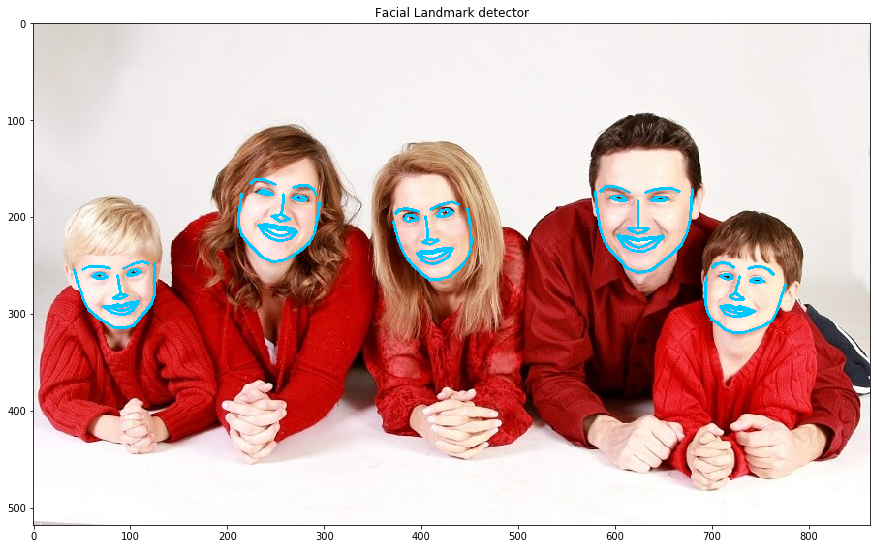

In [0]:
################ Detect faces in the image###############
faceRects = faceDetector(im, 0)
print("Number of faces detected: ",len(faceRects))

# List to store landmarks of all detected faces
landmarksAll = []

#########Detect landmarks for each face ##################
# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                          int(faceRects[i].top()),
                          int(faceRects[i].right()),
                          int(faceRects[i].bottom()))
  # For every face rectangle, run landmarkDetector
  landmarks = landmarkDetector(im, newRect)
  # Print number of landmarks
  if i==0:
    print("Number of landmarks",len(landmarks.parts()))

  # Store landmarks for current face
  landmarksAll.append(landmarks)

  # Next, we render the outline of the face using
  # detected landmarks.
  renderFace(im, landmarks)

  # The code below saves the landmarks to 
  # results/family_0.txt … results/family_4.txt.
  landmarksFileName = landmarksBasename +"_"+ str(i)+ ".txt"
  print("Saving landmarks to", landmarksFileName)
  # Write landmarks to disk
  writeLandmarksToFile(landmarks, landmarksFileName)

outputFileName = "/content/results/familyLandmarks.jpg"
print("Saving output image to", outputFileName)
cv2.imwrite(outputFileName, im)


plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title("Facial Landmark detector")
plt.show()

## Face Alignment



In [0]:
!wget 'https://github.com/arjuntheprogrammer/TheSchoolOfAI/raw/master/OtherExamples/OpticalFlow/shape_predictor_5_face_landmarks.dat' -O 'shape_predictor_5_face_landmarks.dat'
!wget 'https://github.com/arjuntheprogrammer/TheSchoolOfAI/raw/master/OtherExamples/OpticalFlow/shape_predictor_68_face_landmarks.dat' -O 'shape_predictor_68_face_landmarks.dat'
!wget 'https://raw.githubusercontent.com/arjuntheprogrammer/TheSchoolOfAI/master/OtherExamples/OpticalFlow/faceBlendCommon.py' -O 'faceBlendCommon.py'
!wget 'https://user-images.githubusercontent.com/15984084/69810986-1ee19400-1213-11ea-9745-64399cf0634e.jpg' -O 'face2.jpg'

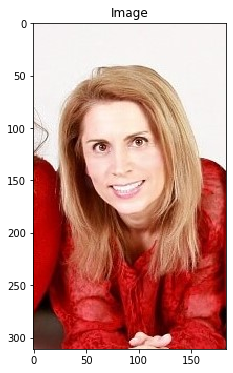

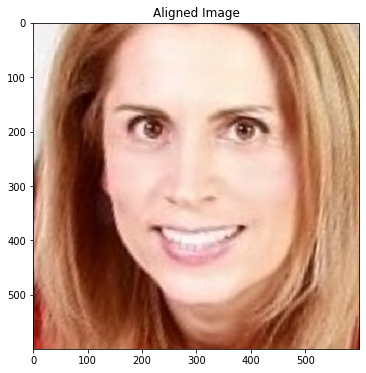

In [0]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# Landmark model location
PREDICTOR_PATH = '/content/shape_predictor_5_face_landmarks.dat'
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
# Read image
im = cv2.imread("/content/face2.jpg")
plt.imshow(im[:,:,::-1])
plt.title("Image")
plt.show()

# Detect landmarks.
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
points = np.array(points)

# Convert image to floating point in the range 0 to 1
im = np.float32(im)/255.0

# Dimensions of output image
h = 600
w = 600

# Normalize image to output coordinates.
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)
 
imNorm = np.uint8(imNorm*255)
# Display the results
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()

## How to stabilize landmark points in a video


In [0]:
!wget 'https://github.com/arjuntheprogrammer/TheSchoolOfAI/raw/master/OtherExamples/OpticalFlow/IMG_6079.MOV'  -O 'IMG_6061.MOV'

In [0]:
import cv2, dlib
import numpy as np
import math, sys
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# Function to calculate the intereye distance.
def interEyeDistance(predict):
  leftEyeLeftCorner = (predict[36].x, predict[36].y)
  rightEyeRightCorner = (predict[45].x, predict[45].y)
  distance = cv2.norm(np.array(rightEyeRightCorner) - np.array(leftEyeLeftCorner))
  distance = int(distance)
  return distance

def processVideo(videoFileName, framesList, showStabilized=False):

  PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
  RESIZE_HEIGHT = 480
  NUM_FRAMES_FOR_FPS = 100
  SKIP_FRAMES = 1
  # Initializing video capture object.
  cap = cv2.VideoCapture(videoFileName)

  if(cap.isOpened()==False):
    print("Unable to load video")

  winSize = 101
  maxLevel = 10
  fps = 30.0
  # Grab a frame
  ret,imPrev = cap.read()


  # Finding the size of the image.
  size = imPrev.shape[0:1]

  detector = dlib.get_frontal_face_detector()
  landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

  # Initializing the parameters
  points=[]
  pointsPrev=[]
  pointsDetectedCur=[]
  pointsDetectedPrev=[]

  eyeDistanceNotCalculated = True
  eyeDistance = 0
  isFirstFrame = True
  # Initial value, actual value calculated after 100 frames
  fps = 10
  # showStabilized = True
  count =0

  while(True):
    if (count==0):
      t = cv2.getTickCount()

    # Grab a frame
    success,im = cap.read()
    if not success:
        break
    im = cv2.resize(im, None, fx=1.0/4, fy=1.0/4,interpolation = cv2.INTER_LINEAR)
  
    imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    # COnverting to grayscale
    imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    imGrayPrev = imGray

    height = im.shape[0]
    IMAGE_RESIZE = float(height)/RESIZE_HEIGHT
    # Resize image for faster face detection
    imSmall = cv2.resize(im, None, fx=1.0/IMAGE_RESIZE, fy=1.0/IMAGE_RESIZE,interpolation = cv2.INTER_LINEAR)
    imSmallDlib = cv2.cvtColor(imSmall, cv2.COLOR_BGR2RGB)
    # Skipping the frames for faster processing
    if (count % SKIP_FRAMES == 0):
      faces = detector(imSmallDlib,0)

    for i in range(0,len(faces)):
      # print("face detected")
      # Face detector was found over a smaller image.
      # So, we scale face rectangle to correct size.
      newRect = dlib.rectangle(int(faces[i].left() * IMAGE_RESIZE),
        int(faces[i].top() * IMAGE_RESIZE),
        int(faces[i].right() * IMAGE_RESIZE),
        int(faces[i].bottom() * IMAGE_RESIZE))
      
      # Detect landmarks in current frame
      landmarks = landmarkDetector(imDlib, newRect).parts()
      
      # Handling the first frame of video differently,for the first frame copy the current frame points
      
      if (isFirstFrame==True):
        pointsPrev=[]
        pointsDetectedPrev = []
        [pointsPrev.append((p.x, p.y)) for p in landmarks]
        [pointsDetectedPrev.append((p.x, p.y)) for p in landmarks]

      # If not the first frame, copy points from previous frame.
      else:
        pointsPrev=[]
        pointsDetectedPrev = []
        pointsPrev = points
        pointsDetectedPrev = pointsDetectedCur

      # pointsDetectedCur stores results returned by the facial landmark detector
      # points stores the stabilized landmark points
      points = []
      pointsDetectedCur = []
      [points.append((p.x, p.y)) for p in landmarks]
      [pointsDetectedCur.append((p.x, p.y)) for p in landmarks]

      # Convert to numpy float array
      pointsArr = np.array(points,np.float32)
      pointsPrevArr = np.array(pointsPrev,np.float32)

      # If eye distance is not calculated before
      if eyeDistanceNotCalculated:
        eyeDistance = interEyeDistance(landmarks)
        # print(eyeDistance)
        eyeDistanceNotCalculated = False

      if eyeDistance > 100:
          dotRadius = 3
      else:
        dotRadius = 2

      # print(eyeDistance)
      sigma = eyeDistance * eyeDistance / 400
      s = 2*int(eyeDistance/4)+1

      #  Set up optical flow params
      lk_params = dict(winSize  = (s, s), maxLevel = 5, criteria = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 20, 0.03))
      pointsArr,status, err = cv2.calcOpticalFlowPyrLK(imGrayPrev,imGray,pointsPrevArr,pointsArr,**lk_params)

      # Converting to float
      pointsArrFloat = np.array(pointsArr,np.float32)

      # Converting back to list
      points = pointsArrFloat.tolist()

      # Final landmark points are a weighted average of
      # detected landmarks and tracked landmarks
      for k in range(0,len(landmarks)):
        d = cv2.norm(np.array(pointsDetectedPrev[k]) - np.array(pointsDetectedCur[k]))
        alpha = math.exp(-d*d/sigma)
        points[k] = (1 - alpha) * np.array(pointsDetectedCur[k]) + alpha * np.array(points[k])

      # Drawing over the stabilized landmark points
      if showStabilized is True:
        for p in points:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (255,0,0),-1)
      else:
        for p in pointsDetectedCur:
          cv2.circle(im,(int(p[0]),int(p[1])),dotRadius, (0,0,255),-1)

      isFirstFrame = False
      count = count+1

      # Calculating the fps value
      if ( count == NUM_FRAMES_FOR_FPS):
        t = (cv2.getTickCount()-t)/cv2.getTickFrequency()
        fps = NUM_FRAMES_FOR_FPS/t
        count = 0
        isFirstFrame = True

      # Getting ready for next frame
      imPrev = im
      imGrayPrev = imGray
      framesList.append(im)
  cap.release()

In [0]:
def stackVideos(pathIn, unstabilizedFrames, stabilzedFrames):
  frame_array = []
  vidObj = cv2.VideoCapture(pathIn)
  success, image = vidObj.read()
  index = 0

  for index in range(len(unstabilizedFrames)):
    success, image = vidObj.read()
    if not success:
      break
    image = cv2.resize(image, None, fx=1.0/4, fy=1.0/4,interpolation = cv2.INTER_LINEAR)

    dim = (500, 400)
    resizedOrg = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    resizedUnstabilize = cv2.resize(unstabilizedFrames[index], dim, interpolation = cv2.INTER_AREA)
    resizedStabilize = cv2.resize(stabilzedFrames[index], dim, interpolation = cv2.INTER_AREA)
    vis = np.concatenate((resizedOrg, resizedUnstabilize, resizedStabilize), axis=1)
    frame_array.append(vis)
  return frame_array

In [0]:
def convert_frames_to_video(frames, pathIn,pathOut,fps):
  height , width , layers =  frames[0].shape
  out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*"MJPG"), fps ,(width,height))
  for i in range(len(frames)):
      out.write(frames[i])
  out.release()

In [0]:
unstabilizedFrames = []
stabilzedFrames = []
pathIn= '/content/IMG_6061.MOV'
pathOut = '/content/GEN_VID.avi'
fps = 30

processVideo(pathIn, unstabilizedFrames, showStabilized=False)
processVideo(pathIn, stabilzedFrames, showStabilized=True)
frames = stackVideos(pathIn, unstabilizedFrames, stabilzedFrames)
convert_frames_to_video(frames, pathIn, pathOut, fps)

## Youtube Link to the generated Video
https://youtu.be/hsFa-MkoXFY

This video contains 3 horizontally stacked sub videos:
1. Original Video 
2. Aligned Frame with unstabilized points 
3. Aligned Frame with stabilized points.